## Baye's classifier for Iris species classification with two input features 

### Index:
1. [Data Processing](#head11)
    1. [Selecting Features](#head111)
    2. [Encoding categorical variables](#head112) 
    3. [Splitting the dataset based on the classes](#head113)
2. [Modelling](#head12) 
    1. [Prior Probabilities of each class](#head121) 
    2. [Determining the mean of each classes](#head122) 
    3. [Determining covariance matrix of each classes](#head123)
    4. [Probability density function of each class](#head124) 
    5. [Posterior probability of each class](#head125) 
    6. [Baye's classification](#head126) 
3. [Model Evaluation](#head13)
    1. [Training Data](#head131) 
    2. [Test Data](#head132)
4. [Inference](#head14)
5. [Model for production (Using inbuilt functions)](#head15)
    1. [Accuracy](#head151)
    2. [Confusion Matrix](#head152)
    3. [Saving Model to the disk](#head153)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle

In [6]:
%matplotlib inline

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [8]:
iris_data = pd.read_csv('Iris.csv', index_col='Id')

#### Sample Data 

In [9]:
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


#### Descriptive statistics 

In [10]:
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
X = iris_data.drop(['Species'], axis=1)
Y = iris_data['Species']

### 1. Data Preprocessing <a id='head11'></a>

Checking for null values in the dataset

In [12]:
X.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

In [13]:
Y.isnull().sum()

0

Splitting the dataset into Train and Test Dataset

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [16]:
print(X.shape, X_train.shape, X_test.shape, Y.shape, Y_train.shape, Y_test.shape)

(150, 4) (105, 4) (45, 4) (150,) (105,) (45,)


#### 1. Selecting Features <a id='head111'></a>

Selecting two features which are normally distributed. 

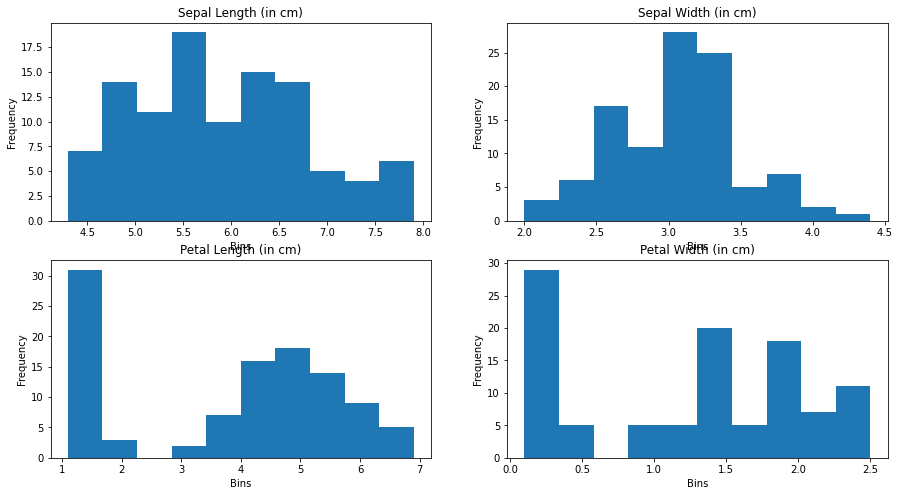

In [17]:
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
plt.hist(X_train['SepalLengthCm'])
plt.title('Sepal Length (in cm)')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.subplot(2, 2, 2)
plt.hist(X_train['SepalWidthCm'])
plt.title('Sepal Width (in cm)')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.subplot(2, 2, 3)
plt.hist(X_train['PetalLengthCm'])
plt.title('Petal Length (in cm)')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.subplot(2, 2, 4)
plt.hist(X_train['PetalWidthCm'])
plt.title('Petal Width (in cm)')
plt.xlabel('Bins')
plt.ylabel('Frequency')

plt.show()

In this problem the 'Sepal Length (in cm)' and the 'Sepal Width (in cm)' are the two features which are normally distributed can be consider for the classification model.

In [18]:
X_train = X_train.drop(['PetalLengthCm', 'PetalWidthCm'], axis=1)

In [19]:
X_test = X_test.drop(['PetalLengthCm', 'PetalWidthCm'], axis=1)

#### 2. Encoding categorical variables <a id='head112'></a>

In [20]:
Y_train = Y_train.map({'Iris-versicolor': 0, 'Iris-virginica': 1, 'Iris-setosa': 2})
Y_test = Y_test.map({'Iris-versicolor': 0, 'Iris-virginica': 1, 'Iris-setosa': 2})

#### 3. Splitting the dataset based on the classes <a id='head113'></a>

The different types of flower species available in the Genus Iris are:

In [21]:
Y_train.unique()

array([0, 1, 2], dtype=int64)

Extracting the training samples for each classes

Let, 
- The Iris-versicolor be the class C1
- The Iris-virginica be the class C2
- The Iris-setosa be the class C3

In [19]:
C1_train = X_train[Y_train == 0]

In [20]:
C2_train = X_train[Y_train == 1]

In [21]:
C3_train = X_train[Y_train == 2]

### 2. Modelling <a id='head12'></a>

To Determine all the required coefficients to built a model.

#### 1. Prior Probabilities of each class <a id='head121'></a>

The Prior probabilities of each class denotes the ratio of number of particular species in the dataset (occurances) to the total number of species in the dataset (Sample space).

1. Iris-Versicolor

In [22]:
C1_prior = len(C1_train)/len(X_train)
C1_prior

0.3047619047619048

2. Iris-Virginica

In [23]:
C2_prior = len(C2_train)/len(X_train)
C2_prior

0.37142857142857144

3. Iris_Setosa

In [24]:
C3_prior = len(C3_train)/len(X_train)
C3_prior

0.3238095238095238

#### 2. Determining the mean of each classes <a id='head122'></a>

Let, 
- mu1 be the mean of Class C1
- mu2 be the mean of Class C2
- mu3 be the mean of Class C3

1. Iris-versicolor

In [25]:
mu1 = C1_train.mean().to_numpy().reshape(2, 1)
mu1

array([[5.921875],
       [2.75625 ]])

2. Iris-virginica

In [26]:
mu2 = C2_train.mean().to_numpy().reshape(2, 1)
mu2

array([[6.65384615],
       [2.98717949]])

3. Iris-setosa

In [27]:
mu3 = C3_train.mean().to_numpy().reshape(2, 1)
mu3

array([[4.99411765],
       [3.38235294]])

#### 3. Determining covariance matrix of each classes <a id='head123'></a>

In [28]:
C1_train_np = C1_train.to_numpy().T
C2_train_np = C2_train.to_numpy().T
C3_train_np = C3_train.to_numpy().T

In [29]:
C1_cov = np.cov(C1_train_np)
C2_cov = np.cov(C2_train_np)
C3_cov = np.cov(C3_train_np)

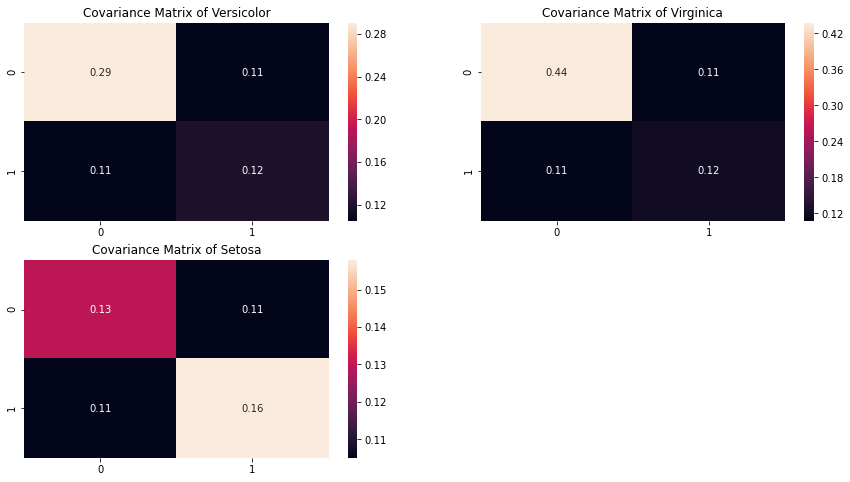

In [30]:
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
sns.heatmap(C1_cov, annot=True)
plt.title('Covariance Matrix of Versicolor')
plt.subplot(2, 2, 2)
sns.heatmap(C2_cov, annot=True)
plt.title('Covariance Matrix of Virginica')
plt.subplot(2, 2, 3)
sns.heatmap(C3_cov, annot=True)
plt.title('Covariance Matrix of Setosa')

plt.show()

#### 4. Probability density function of each class <a id='head124'></a>

The probability density function of Multivariate gaussian distribution is given by,

In [31]:
def probability_density_function(X_set, mu, cov):
    exponential = np.exp((-1/2)*np.diagonal(np.matmul(np.matmul((X_set-mu).T, np.linalg.inv(cov)), X_set-mu)))
    const = np.sqrt(((2*np.pi)**X_set.shape[0])*np.linalg.det(cov))
    return exponential/const

#### 5. Posterior probability of each class <a id='head125'></a>

In [32]:
def posterior_probability(prior_probability, X_set, mu, cov):
    return prior_probability*probability_density_function(X_set, mu, cov)

#### 6. Baye's classification <a id='head126'></a>

In [33]:
def bayes_classification_helper(C1_prob, C2_prob, C3_prob):
    if (C1_prob > C2_prob) and (C1_prob > C3_prob):
        return 0
    elif (C2_prob > C1_prob) and (C2_prob > C3_prob):
        return 1
    else:
        return 2

In [34]:
def bayes_classifier(X_param):
    """
    Used to classify data based on the given parameters.
    
    Warning: Use only pandas DataFrame/pandas Series or Numpy array
    """
    if(isinstance(X_param, pd.DataFrame) or isinstance(X_param, pd.Series)):
        X_param = X_param.to_numpy()
    C1_posterior = []
    C2_posterior = []
    C3_posterior = []
    for i in range(X_param.shape[0]):
        C1_posterior.append(posterior_probability(C1_prior, X_param[i].reshape(2, 1), mu1, C1_cov))
        C2_posterior.append(posterior_probability(C2_prior, X_param[i].reshape(2, 1), mu2, C2_cov))
        C3_posterior.append(posterior_probability(C3_prior, X_param[i].reshape(2, 1), mu3, C3_cov))
      
    return np.array([bayes_classification_helper(C1_posterior[i], C2_posterior[i], C3_posterior[i]) for i in range(X_param.shape[0])])

### 3. Model Evaluation <a id='head13'></a>

#### 1. Training Data <a id='head131'></a>

In [35]:
Y_pred = bayes_classifier(X_train)

1. R<sup>2</sup> Value 

In [36]:
print('Accuracy: ', accuracy_score(Y_train, Y_pred))

Accuracy:  0.8095238095238095


2. Confusion Matrix 

In [37]:
cm = confusion_matrix(Y_train, Y_pred)

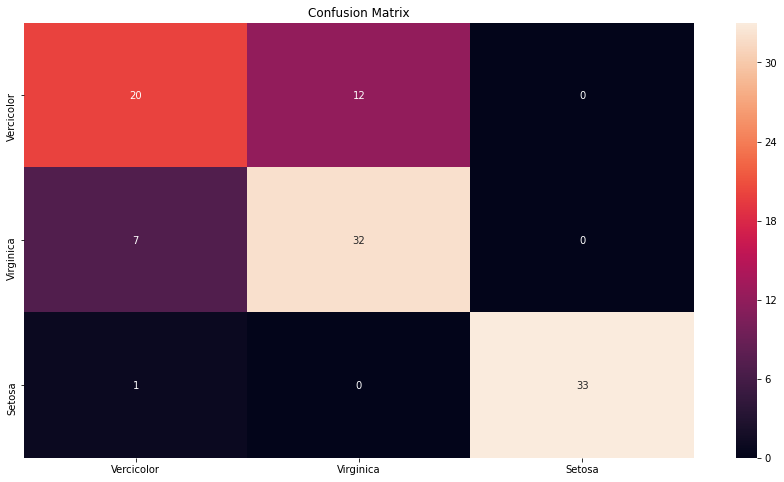

In [38]:
plt.figure(figsize=(15, 8))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xticks((0.5, 1.5, 2.5), ('Vercicolor', 'Virginica', 'Setosa'))
plt.yticks((0.5, 1.5, 2.5), ('Vercicolor', 'Virginica', 'Setosa'))
plt.show()

#### 2. Test Data <a id='head132'></a>

In [39]:
Y_pred = bayes_classifier(X_test)

1. R<sup>2</sup> Value 

In [40]:
print('Accuracy: ', accuracy_score(Y_test, Y_pred))

Accuracy:  0.8


2. Confusion Matrix 

In [41]:
cm = confusion_matrix(Y_test, Y_pred)

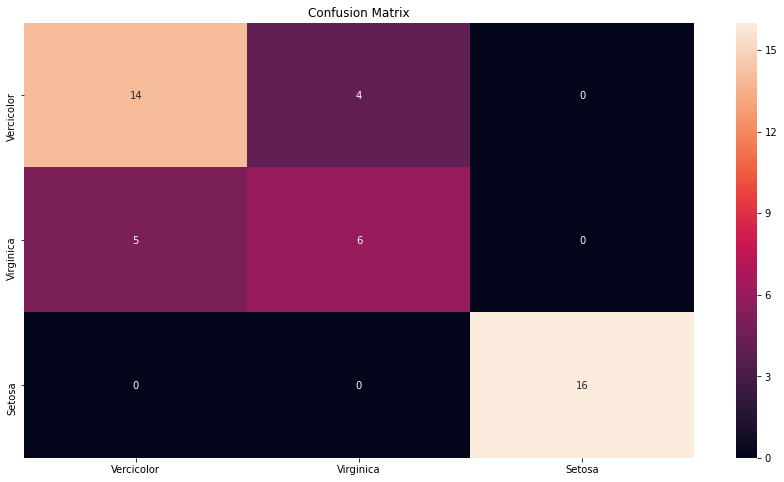

In [42]:
plt.figure(figsize=(15, 8))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xticks((0.5, 1.5, 2.5), ('Vercicolor', 'Virginica', 'Setosa'))
plt.yticks((0.5, 1.5, 2.5), ('Vercicolor', 'Virginica', 'Setosa'))
plt.show()

### 4. Inference <a id='head14'></a> 

Hence the model can able to classify the given data with the accuracy of 80%. This Bayes classifier can able to classify the given data with more than 2 classes.  

#### 1. Probability distribution function <a id='head141'></a>

1. Iris-versicolor

In [43]:
C1_pdf = probability_density_function(C1_train_np, mu1, C1_cov)

2. Iris-virginica

In [44]:
C2_pdf = probability_density_function(C2_train_np, mu2, C2_cov)

3. Iris-setosa

In [45]:
C3_pdf = probability_density_function(C3_train_np, mu3, C3_cov)

The probability density function of each class is graphically reprasented as,

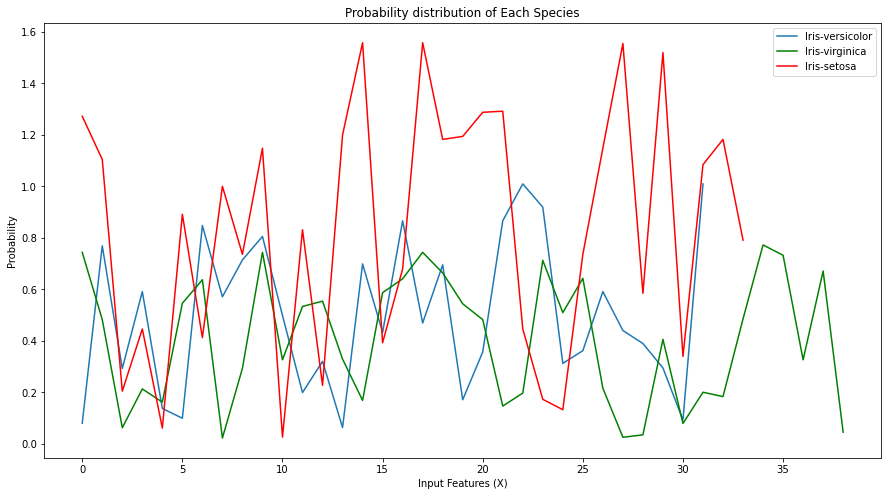

In [46]:
plt.figure(figsize=(15, 8))
plt.plot(C1_pdf)
plt.plot(C2_pdf, color='green')
plt.plot(C3_pdf, color='red')
plt.title('Probability distribution of Each Species')
plt.xlabel('Input Features (X)')
plt.ylabel('Probability')
plt.legend(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa'])


plt.show()

From this graph we can interpert how the probability of class is distributed along different feature values. The main drawback of this classifier is the difficulty in classification when there is a intersection in the probability density function of the classes.

### 5. Model for Production (Using inbulit functions) <a id='head15'></a>

In [22]:
from sklearn.naive_bayes import GaussianNB

In [23]:
NB_classifier = GaussianNB()

In [24]:
NB_classifier.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Generating Predicted Values

In [25]:
Y_pred = NB_classifier.predict(X_test)

#### 1. Accuracy <a id='head151'></a>

In [26]:
print("Accuracy: ", accuracy_score(Y_test, Y_pred))

Accuracy:  0.8


#### 2. Confusion matrix <a id='head152'></a>

In [27]:
cm = confusion_matrix(Y_test, Y_pred)

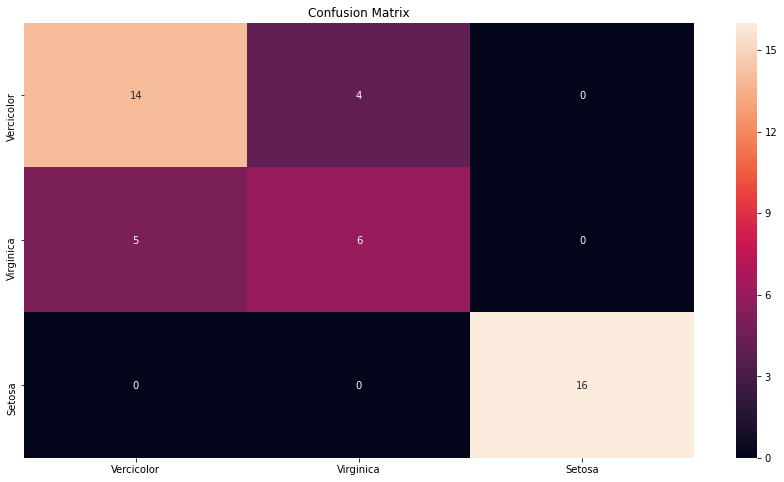

In [28]:
plt.figure(figsize=(15, 8))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xticks((0.5, 1.5, 2.5), ('Vercicolor', 'Virginica', 'Setosa'))
plt.yticks((0.5, 1.5, 2.5), ('Vercicolor', 'Virginica', 'Setosa'))
plt.show()

#### 3. Saving model to the disk <a id='head153'></a>

In [55]:
pickle.dump(NB_classifier, open('model.pkl', 'wb'))